In [240]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [242]:
from sklearn import linear_model
import math

# Read Data (Titanic)

In [243]:
data=pd.read_csv('titanic2.csv')

In [244]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [245]:
print("# of passengers in original data: "+ str(len(data.index)))

# of passengers in original data: 891


# Analyze Data

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

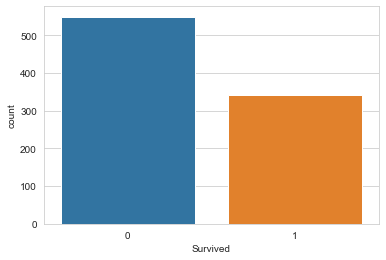

In [247]:
sns.countplot(x="Survived",data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

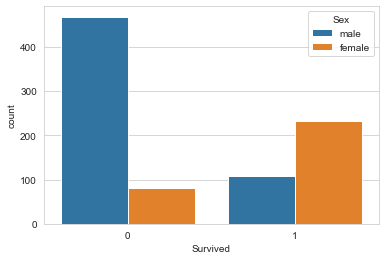

In [248]:
sns.countplot(x='Survived',hue='Sex', data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

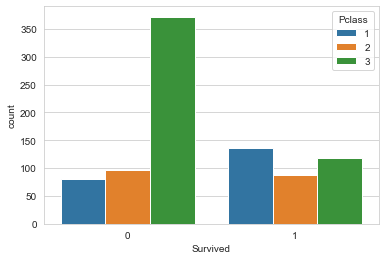

In [249]:
sns.countplot(x="Survived",hue="Pclass",data=data)

<AxesSubplot:ylabel='Frequency'>

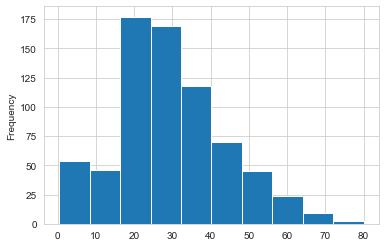

In [250]:
data['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

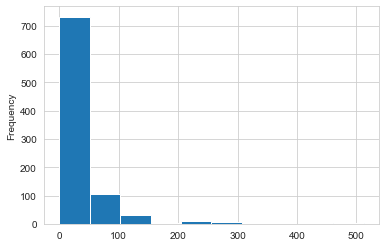

In [251]:
data['Fare'].plot.hist()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

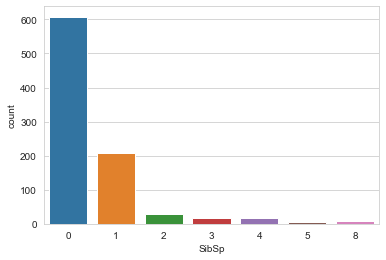

In [252]:
sns.countplot(x="SibSp",data=data)

# Data Wrangling

In [253]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [254]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [255]:
data.drop(columns=['Cabin'],inplace=True)

In [256]:
data.dropna(inplace=True)

In [257]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [258]:
sex=pd.get_dummies(data['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [259]:
em=pd.get_dummies(data['Embarked'],drop_first=True)
em.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [260]:
Pcl=pd.get_dummies(data['Pclass'],drop_first=True)
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [261]:
data=pd.concat([data,sex,em,Pcl],axis=1)

In [262]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [263]:
data.drop(columns=['Embarked'],inplace=True)

In [264]:
data.drop(columns=['Pclass'],inplace=True)

In [265]:
data.drop(columns=['Sex'],inplace=True)

In [266]:
data.drop(columns=['PassengerId'],inplace=True)

In [267]:
data.drop(columns=['Name'],inplace=True)

In [268]:
data.drop(columns=['Ticket'],inplace=True)

In [269]:
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Training & Testing Data

In [271]:
X=data.drop("Survived",axis=1)
Y=data["Survived"]

In [276]:
from sklearn.model_selection import train_test_split

In [277]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=3)

In [278]:
from sklearn.linear_model import LogisticRegression

In [279]:
logreg=LogisticRegression()

In [281]:
logreg.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [282]:
from sklearn import metrics

Y_pred = logreg.predict(X_test)

print(Y_pred)

[1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1
 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1
 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0]


In [283]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       176
           1       0.84      0.68      0.75       109

    accuracy                           0.83       285
   macro avg       0.83      0.80      0.81       285
weighted avg       0.83      0.83      0.82       285



In [285]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.8280701754385965
